In [5]:
%load_ext autoreload
%reload_ext autoreload
#%autoreload 2

from myutils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# import
import os, json, glob
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload; 

%matplotlib inline

In [22]:
import utils; reload(utils)
from utils import plots

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.sgdr import *
from fastai.plots import *

In [8]:
print(os.getcwd())
path='../../../datasets/dogsncats/'

/home/atul/Git/DeepLearning/fast.ai/meLearning


In [12]:
# DO NOT USE
# this is all in one function
# It will copy the data into train_1 and then split into valid and sample without
# impacting the original dataset
#data_splitter('../../../datasets/dogsncats/train', '../../../datasets/dogsncats', nsample=1, nvalid=2, labels=['cat', 'dog'])
#data_splitter('../../../datasets/dogsncats/train', '../../../datasets/dogsncats', nsample=1, nvalid=2)

In [11]:
# # This will create the label wise sub directories and move the data
# dataCategorizer(list(['cat', 'dog']), "../../../datasets/dogsncats/train")

# # sampling the data from training set
# data_sampler(10, '../../../datasets/dogsncats/train/cat', '../../../datasets/dogsncats/sample/cat')
# data_sampler(10, '../../../datasets/dogsncats/train/dog', '../../../datasets/dogsncats/sample/dog')

# # validation data
# data_sampler(2000, '../../../datasets/dogsncats/train/cat', '../../../datasets/dogsncats/valid/cat')
# data_sampler(2000, '../../../datasets/dogsncats/train/dog', '../../../datasets/dogsncats/valid/dog')

Total Files moved to  ../../../datasets/dogsncats/sample/cat  :  10
Total Files moved to  ../../../datasets/dogsncats/sample/dog  :  10
Total Files moved to  ../../../datasets/dogsncats/valid/cat  :  2000
Total Files moved to  ../../../datasets/dogsncats/valid/dog  :  2000


In [13]:
cat_files = !ls -1 '{path}/train/cat' | head
cat_files

['cat.0.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg']

In [14]:
# displaying the image
img = plt.imread(f'{path}/train/cat/{cat_files[2]}')
print(img.shape)

(374, 500, 3)


In [15]:
print(img)

[[[145 122  70]
  [145 122  70]
  [144 121  69]
  ...
  [213 165 181]
  [213 165 181]
  [213 165 181]]

 [[147 124  72]
  [145 122  70]
  [142 119  67]
  ...
  [208 160 176]
  [208 160 176]
  [208 160 176]]

 [[146 123  71]
  [143 120  68]
  [139 116  64]
  ...
  [207 158 177]
  [207 158 177]
  [207 158 177]]

 ...

 [[ 18  16  17]
  [ 20  18  19]
  [ 22  20  21]
  ...
  [198 145 163]
  [197 144 162]
  [196 143 161]]

 [[ 18  16  17]
  [ 20  18  19]
  [ 22  20  21]
  ...
  [198 145 163]
  [197 144 162]
  [196 143 161]]

 [[ 18  16  17]
  [ 19  17  18]
  [ 21  19  20]
  ...
  [198 145 163]
  [197 144 162]
  [196 143 161]]]


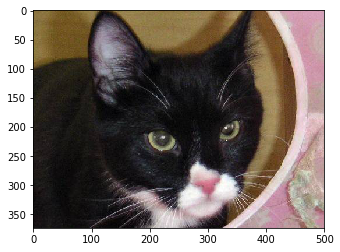

In [16]:
plt.imshow(img)

## Using Vgg16 pretrained Net

batch_size = 64
print(sys.path)
#sys.path.insert(0, '/home/sanmati/zatul/git/DeepLearning/fast.ai/meLearning')
#sys.path.insert(0, '')
print()
print(sys.path)

# Import our class, and instantiate  
from vgg16up import *; reload(vgg16up); from vgg16up import Vgg16

vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

## Using resnet pretrained model

In [25]:
sz=299
arch = resnet34
data = ImageClassifierData.from_paths(path, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/atul/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [01:44<00:00, 835606.82it/s]
/home/atul/anaconda/envs/gpu/lib/python3.6/site-packages/torch/cuda/__init__.py:97: UserWarning: 
    Found GPU0 GeForce 940MX which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


RuntimeError: cuda runtime error (48) : no kernel image is available for execution on the device at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCTensorMath.cu:15